In [1]:
!pip install youtube_dl
!pip install SpeechRecognition pydub

     |████████████████████████████████| 1.8MB 2.5MB/s 
     |████████████████████████████████| 32.8MB 2.0MB/s 


In [2]:
from __future__ import unicode_literals
import youtube_dl as yt

In [4]:
help(yt)

Help on package youtube_dl:

NAME
    youtube_dl - # coding: utf-8

PACKAGE CONTENTS
    YoutubeDL
    __main__
    aes
    cache
    compat
    downloader (package)
    extractor (package)
    jsinterp
    options
    postprocessor (package)
    socks
    swfinterp
    update
    utils
    version

CLASSES
    builtins.object
        youtube_dl.YoutubeDL.YoutubeDL
    
    class YoutubeDL(builtins.object)
     |  YoutubeDL class.
     |  
     |  YoutubeDL objects are the ones responsible of downloading the
     |  actual video file and writing it to disk if the user has requested
     |  it, among some other tasks. In most cases there should be one per
     |  program. As, given a video URL, the downloader doesn't know how to
     |  extract all the needed information, task that InfoExtractors do, it
     |  has to pass the URL to one of them.
     |  
     |  For this, YoutubeDL objects have a method that allows
     |  InfoExtractors to be registered in a given order. When it is pa

In [56]:
video_url = 'https://www.youtube.com/watch?v=EiKK04Ht8QI'

In [9]:
info = yt.YoutubeDL().extract_info(url=video_url, download=False)
info

[youtube] XxXFMsXayw0: Downloading webpage


{'abr': 160,
 'acodec': 'opus',
 'age_limit': 0,
 'album': None,
 'alt_title': None,
 'annotations': None,
 'artist': None,
 'automatic_captions': {},
 'average_rating': 4.9700708,
 'categories': ['Film & Animation'],
 'channel_id': 'UC9DVLSORwF-WXX1poYiou6g',
 'channel_url': 'http://www.youtube.com/channel/UC9DVLSORwF-WXX1poYiou6g',
 'chapters': None,
 'creator': None,
 'description': 'Com a MÚSICA CANTADA: https://www.youtube.com/watch?v=V7T1ULv3jfI\nSerá cancelado a música neste canal a qualquer momento!\n\nDigimon 4 Frontier Abertura - Dublado\nPor favor, pessoal, se inscreva no canal para ele crescer! Peço muito a ajuda de vocês!',
 'dislike_count': None,
 'display_id': 'XxXFMsXayw0',
 'duration': 106,
 'end_time': None,
 'episode_number': None,
 'ext': 'mp4',
 'extractor': 'youtube',
 'extractor_key': 'Youtube',
 'format': '135 - 640x480 (480p)+251 - audio only (tiny)',
 'format_id': '135+251',
 'formats': [{'abr': 50,
   'acodec': 'opus',
   'asr': 48000,
   'downloader_options'

# Useful implicit information extracted from video

In [64]:
def extract_and_print_info(info):
  print('Video title -> ', info['title'])
  print('Video view count -> ', info['view_count'])
  print('Video Uploader -> ', info['uploader_id'])
  print('Video has subtitles? -> ', len(info['subtitles'].keys()) > 0)
  print('Video Artist -> ', info['artist'])
  print('Video Categories -> ', info['categories'])
  print('Video Source -> ', info['extractor_key'])
  print('Video Duration -> ', "{:.2f} minutes".format(info['duration'] / 60))
  print('Video Extraction format -> ', info['ext'])
  print('Video Age limit -> ', 'No' if (info['age_limit'] == 0) else info['age_limit'])
  print('Video Avarage rating -> ', "{:.2f}".format(info['average_rating']))
  print('Video Overral FPS -> ', info['fps'])
  print('Video ID -> ', info['id'])
  print('Video Format -> ', info['format'])
  print('Video Tags -> ', info['tags'])
  print('Video Thumbnail URL -> ', info['thumbnail'])

  print('\n')
  print('Video Description -> \n', info['description'])

  return {
      'title': info['title'],
      'view_count': info['view_count'],
      'uploader_id': info['uploader_id'],
      'subtitles': info['subtitles'],
      'artist': info['artist'],
      'categories': info['categories'],
      'extractor_key': info['extractor_key'],
      'video_duration': info['duration'],
      'ext': info['ext'],
      'age_limit': info['age_limit'],
      'average_rating': info['average_rating'],
      'fps': info['fps'],
      'video_id': info['id'],
      'format': info['format'],
      'tags': info['tags'],
      'thumb_url': info['thumbnail'],
      'description': info['description']
  }

In [41]:
if len(info['subtitles'].keys()) > 0:
  print(info['subtitles'])


In [57]:
def download_sound_file(video_url, source='youtube'):
  """
  Downloads the audio file of the video
  """

  ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
      'key': 'FFmpegExtractAudio',
      'preferredcodec': 'mp3',
      'preferredquality': '192',
    }]
  }

  output_file_name = None
  extracted_info = None
  with yt.YoutubeDL(ydl_opts) as ydl:
    extracted_info = ydl.extract_info(url=video_url, download=False)
    output_file_name = ydl.prepare_filename(extracted_info)
    ydl.download([video_url])

  return output_file_name, extracted_info

In [58]:
output_file_name, extracted_info = download_sound_file(video_url)

[youtube] EiKK04Ht8QI: Downloading webpage
[youtube] EiKK04Ht8QI: Downloading webpage
[download] Destination: Don't Be A Programmer-EiKK04Ht8QI.webm
[download] 100% of 3.22MiB in 00:00
[ffmpeg] Destination: Don't Be A Programmer-EiKK04Ht8QI.mp3
Deleting original file Don't Be A Programmer-EiKK04Ht8QI.webm (pass -k to keep)


In [65]:
extracted_info = extract_and_print_info(extracted_info)

Video title ->  Don't Be A Programmer
Video view count ->  2121511
Video Uploader ->  UCV0qA-eDDICsRR9rPcnG7tw
Video has subtitles? ->  False
Video Artist ->  None
Video Categories ->  ['People & Blogs']
Video Source ->  Youtube
Video Duration ->  3.75 minutes
Video Extraction format ->  webm
Video Age limit ->  No
Video Avarage rating ->  4.83
Video Overral FPS ->  None
Video ID ->  EiKK04Ht8QI
Video Format ->  251 - audio only (tiny)
Video Tags ->  ['joma', 'vlog', 'progammer', 'ibm', 'call for code', 'software engineer', 'programming', "don't be a programmer", 'engineer']
Video Thumbnail URL ->  https://i.ytimg.com/vi_webp/EiKK04Ht8QI/maxresdefault.webp


Video Description -> 
 ► Learn how to code with Python 3 for Data Science and Software Engineering. High-quality video courses:
http://python.jomaclass.com/

► Resume Template and Cover letter I used for applying to software internships and full-time jobs:
https://resume.joma.io
► Social Media
https://www.instagram.com/jomaoppa/
ht

# Video sound to text features extraction

In [67]:
import speech_recognition as sr 
import os
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [72]:
def convert_sound_to_text(sound_file):
  if 'webm' in sound_file:
    sound_file = sound_file.replace('webm', 'mp3')
  r = sr.Recognizer()
  folder_name = "audio-chunks"
  sound = AudioSegment.from_mp3(sound_file)

  chunks = split_on_silence(
    sound,
    min_silence_len = 500,
    silence_thresh = sound.dBFS-14,
    keep_silence=500,
  )

  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  converted_text = ""

  for i, audio_chunk in enumerate(chunks, start=1):
    chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
    audio_chunk.export(chunk_filename, format="wav")
    with sr.AudioFile(chunk_filename) as source:
      audio_listened = r.record(source)
      try:
        text = r.recognize_google(audio_listened)
      except sr.UnknownValueError as e:
        print("Error:", str(e))
      else:
        text = f"{text.capitalize()}. "
        print(chunk_filename, ":", text)
        converted_text += text

  return converted_text

In [73]:
sound_text = convert_sound_to_text(output_file_name)

audio-chunks/chunk1.wav : I got a lot of questions about programming but i don't think they're the right questions to ask questions like. 
audio-chunks/chunk2.wav : How many languages do i need to learn what language do i need to learn to get to company x what's the difference between a and b and which makes more money what are the exact steps i need to take. 
audio-chunks/chunk3.wav : To become the. 
audio-chunks/chunk4.wav : What kind of program should i write to build up my resume so why don't i like these questions because it feels like the people who are asking these questions they are learning how to program just for the sake of learning how to program. 
audio-chunks/chunk5.wav : The program is just a tool. 
audio-chunks/chunk6.wav : Being a programmer for me means you write code to automate things. 
audio-chunks/chunk7.wav : Or to make things perform certain actions for example programming a refrigerator to turn on the light when you open the door. 
audio-chunks/chunk8.wav : Whe

In [75]:
sound_text

"I got a lot of questions about programming but i don't think they're the right questions to ask questions like. How many languages do i need to learn what language do i need to learn to get to company x what's the difference between a and b and which makes more money what are the exact steps i need to take. To become the. What kind of program should i write to build up my resume so why don't i like these questions because it feels like the people who are asking these questions they are learning how to program just for the sake of learning how to program. The program is just a tool. Being a programmer for me means you write code to automate things. Or to make things perform certain actions for example programming a refrigerator to turn on the light when you open the door. When you think about it. Programming is actually kind of boring. You're just giving a series of instructions to a machine over and over again until you get it right i don't want to speak for all of you. But i think it

In [93]:
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import ne_chunk
from nltk import RegexpParser

In [91]:
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [99]:
def post_text_process(text):
  """
    Performs a post process with the text, preparing it for text deep analysis
    or other purposes.
  """
  # Splits words to tokens
  tokenized_word = word_tokenize(text.lower())

  # Normalize words to normal form
  # aka: playing -> play
  lemmatizer = WordNetLemmatizer()
  lemmatized_words = []
  for word in tokenized_word:
    lemmatized_words.append(lemmatizer.lemmatize(word))
  
  # Remove stopwords from the set
  stopwords_set = set(stopwords.words('english'))
  stopwords_set.add('.')
  stopwords_text = [word for word in lemmatized_words if word not in stopwords_set]

  # Create a frequency distribution set, returned at the end
  fdist = FreqDist(stopwords_text)

  # Named entity recognition
  tags = nltk.pos_tag(stopwords_text)
  chunk = ne_chunk(tags)

  chunking_rule = "NP: {<DT>?<JJ>*<NN>}"
  chunking_text_parsed = RegexpParser(chunking_rule)
  chunking_result = chunking_text_parsed.parse(tags)

  # Returns important information created by the post processing
  return _, chunking_result, chunk, fdist


In [100]:
_, chunking_result, chunk, fdist = post_text_process(sound_text)

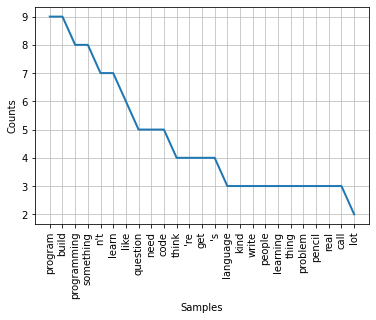

In [105]:
import matplotlib.pyplot as plt
fdist.plot(25, cumulative=False)
plt.show()